# HR Data Analysis and Employee Performance Insights

## Objective:
The project aims to analyze HR data to uncover trends, patterns, and relationships that can help optimize employee performance, engagement, retention, and overall organizational efficiency. By utilizing various data processing, visualization, and predictive modeling techniques, the project seeks to provide actionable insights for HR managers, decision-makers, and team leads.


Performance Trends by Department and Year:
           Department  Year  PerformanceNumeric
0       Admin Offices  2008            2.000000
1       Admin Offices  2009            2.000000
2       Admin Offices  2011            2.000000
3       Admin Offices  2014            2.000000
4       Admin Offices  2015            2.000000
5       Admin Offices  2016            2.000000
6         Engineering  2011            2.000000
7         Engineering  2012            2.000000
8         Engineering  2013            2.000000
9         Engineering  2014            2.500000
10   Executive Office  2012            2.000000
11              IT/IS  2010            2.500000
12              IT/IS  2011            2.666667
13              IT/IS  2012            1.666667
14              IT/IS  2013            2.000000
15              IT/IS  2014            2.300000
16              IT/IS  2015            1.950000
17              IT/IS  2016            2.000000
18              IT/IS  2017            2.000

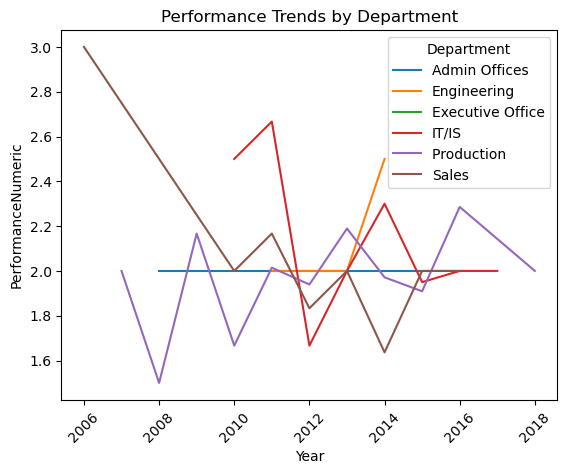


Percentage of employees exceeding KPIs: 11.90%


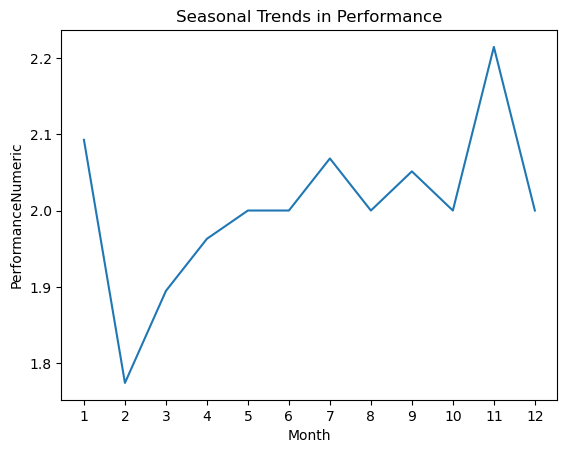


Performance by Tenure Bins:
        Tenure  PerformanceNumeric
0   (0.0, 1.0]                 NaN
1   (1.0, 3.0]                 NaN
2   (3.0, 5.0]                 NaN
3  (5.0, 10.0]            2.000000
4  (10.0, inf]            2.023622


C:\Users\barad\AppData\Local\Temp\ipykernel_8252\143627254.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_performance = df.groupby(pd.cut(df['Tenure'], bins=[0, 1, 3, 5, 10, np.inf]))['PerformanceNumeric'].mean().reset_index()


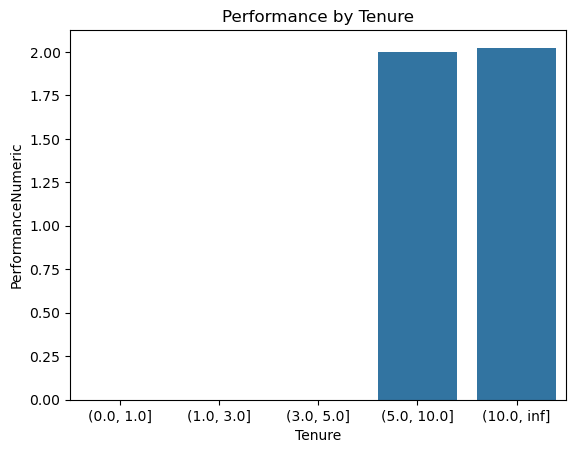


Correlation between Satisfaction and Performance: 0.23


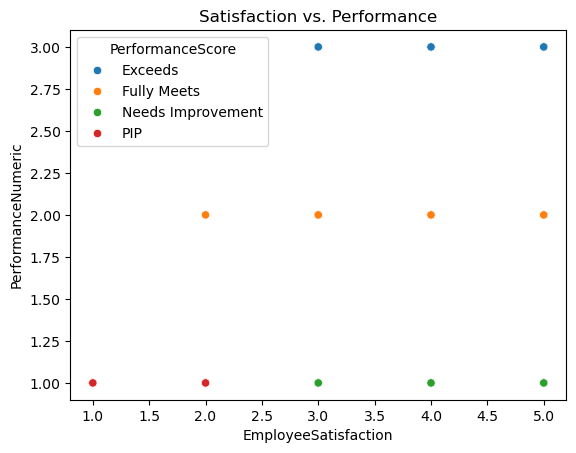


High Performer Turnover Rate: 18.92%

Performance by Gender:
  Gender  PerformanceNumeric
0      F            2.034091
1     M             2.000000


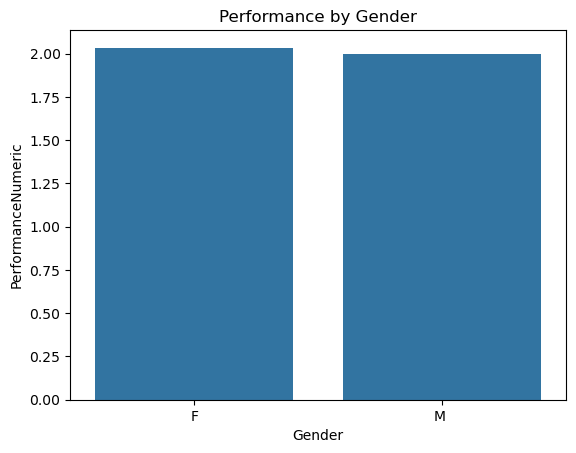

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'HRData.csv'
df = pd.read_csv(file_path)

# Convert dates to datetime format for calculations
def safe_date_conversion(date_series, column_name):
    try:
        return pd.to_datetime(date_series, errors='coerce')
    except Exception as e:
        print(f"Error converting dates in column '{column_name}': {e}")
        return pd.NaT

df['HiringDate'] = safe_date_conversion(df['HiringDate'], 'HiringDate')
df['TerminationDate'] = safe_date_conversion(df['TerminationDate'], 'TerminationDate')

# Calculate tenure for active employees
df['Tenure'] = (pd.Timestamp.now() - df['HiringDate']).dt.days / 365

def categorize_performance(performance):
    if performance == "Exceeds":
        return 3
    elif performance == "Fully Meets":
        return 2
    else:
        return 1

# Add a numeric performance score
df['PerformanceNumeric'] = df['PerformanceScore'].apply(categorize_performance)

# --- Performance Trends ---
# 1. Performance evolution over the past year by department
if 'Year' not in df.columns:
    df['Year'] = df['HiringDate'].dt.year  # Assuming HiringDate reflects active year

performance_trends = df.groupby(['Department', 'Year'])['PerformanceNumeric'].mean().reset_index()
print("\nPerformance Trends by Department and Year:")
print(performance_trends)

sns.lineplot(data=performance_trends, x='Year', y='PerformanceNumeric', hue='Department')
plt.title('Performance Trends by Department')
plt.xticks(rotation=45)
plt.show()

# 2. Percentage of employees exceeding KPIs
exceeds_kpis = len(df[df['PerformanceScore'] == 'Exceeds']) / len(df) * 100
print(f"\nPercentage of employees exceeding KPIs: {exceeds_kpis:.2f}%")

# 3. Seasonal trends in performance
if 'Month' not in df.columns:
    df['Month'] = df['HiringDate'].dt.month
seasonal_performance = df.groupby('Month')['PerformanceNumeric'].mean().reset_index()

sns.lineplot(data=seasonal_performance, x='Month', y='PerformanceNumeric')
plt.title('Seasonal Trends in Performance')
plt.xticks(range(1, 13))
plt.show()

# 4. Tenure effect on performance
tenure_performance = df.groupby(pd.cut(df['Tenure'], bins=[0, 1, 3, 5, 10, np.inf]))['PerformanceNumeric'].mean().reset_index()
print("\nPerformance by Tenure Bins:")
print(tenure_performance)

sns.barplot(data=tenure_performance, x='Tenure', y='PerformanceNumeric')
plt.title('Performance by Tenure')
plt.show()

# --- Employee Engagement ---
# 5. Correlation between satisfaction and performance
correlation = df['EmployeeSatisfaction'].corr(df['PerformanceNumeric'])
print(f"\nCorrelation between Satisfaction and Performance: {correlation:.2f}")

sns.scatterplot(data=df, x='EmployeeSatisfaction', y='PerformanceNumeric', hue='PerformanceScore')
plt.title('Satisfaction vs. Performance')
plt.show()

# 6. Participation in company events
if 'EventParticipation' in df.columns:
    event_performance = df.groupby('EventParticipation')['PerformanceNumeric'].mean().reset_index()
    print("\nPerformance by Event Participation:")
    print(event_performance)

    sns.barplot(data=event_performance, x='EventParticipation', y='PerformanceNumeric')
    plt.title('Performance by Event Participation')
    plt.show()

# 7. High performer turnover
high_performers = df[df['PerformanceScore'] == 'Exceeds']
high_turnover_rate = len(high_performers[high_performers['EmploymentStatus'] == 'Voluntarily Terminated']) / len(high_performers) * 100
print(f"\nHigh Performer Turnover Rate: {high_turnover_rate:.2f}%")

# --- Training and Development ---
# 8. ROI of training programs
if 'TrainingHours' in df.columns:
    df['PerformanceImprovement'] = df['PerformanceNumeric'] - df['PerformanceNumeric'].shift()
    training_roi = df.groupby('TrainingHours')['PerformanceImprovement'].mean().reset_index()
    print("\nTraining ROI:")
    print(training_roi)

    sns.barplot(data=training_roi, x='TrainingHours', y='PerformanceImprovement')
    plt.title('ROI of Training Programs')
    plt.show()

# --- Attendance and Punctuality ---
# 9. Absenteeism correlation with performance
if 'AbsenteeismDays' in df.columns:
    absenteeism_corr = df['AbsenteeismDays'].corr(df['PerformanceNumeric'])
    print(f"\nCorrelation between Absenteeism and Performance: {absenteeism_corr:.2f}")

# --- Rewards and Recognition ---
# 10. Impact of recognition on performance
if 'RecognitionCount' in df.columns:
    recognition_impact = df.groupby('RecognitionCount')['PerformanceNumeric'].mean().reset_index()
    print("\nPerformance by Recognition Count:")
    print(recognition_impact)

    sns.barplot(data=recognition_impact, x='RecognitionCount', y='PerformanceNumeric')
    plt.title('Performance by Recognition')
    plt.show()

# --- Work-Life Balance ---
# 11. Overtime and performance
if 'OvertimeHours' in df.columns:
    overtime_performance = df.groupby('OvertimeHours')['PerformanceNumeric'].mean().reset_index()
    print("\nPerformance by Overtime Hours:")
    print(overtime_performance)

    sns.lineplot(data=overtime_performance, x='OvertimeHours', y='PerformanceNumeric')
    plt.title('Overtime vs. Performance')
    plt.show()

# --- Diversity and Inclusion ---
# 12. Performance by gender
gender_performance = df.groupby('Gender')['PerformanceNumeric'].mean().reset_index()
print("\nPerformance by Gender:")
print(gender_performance)

sns.barplot(data=gender_performance, x='Gender', y='PerformanceNumeric')
plt.title('Performance by Gender')
plt.show()

# --- Predictive Insights ---
# 13. Factors predictive of high performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target
if 'AbsenteeismDays' in df.columns and 'TrainingHours' in df.columns:
    features = df[['AbsenteeismDays', 'TrainingHours', 'OvertimeHours', 'EmployeeSatisfaction']]
    target = (df['PerformanceScore'] == 'Exceeds').astype(int)

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': model.feature_importances_})
    print("\nFeature Importances:")
    print(feature_importances.sort_values(by='Importance', ascending=False))

    sns.barplot(data=feature_importances, x='Importance', y='Feature')
    plt.title('Feature Importances for High Performance')
    plt.show()


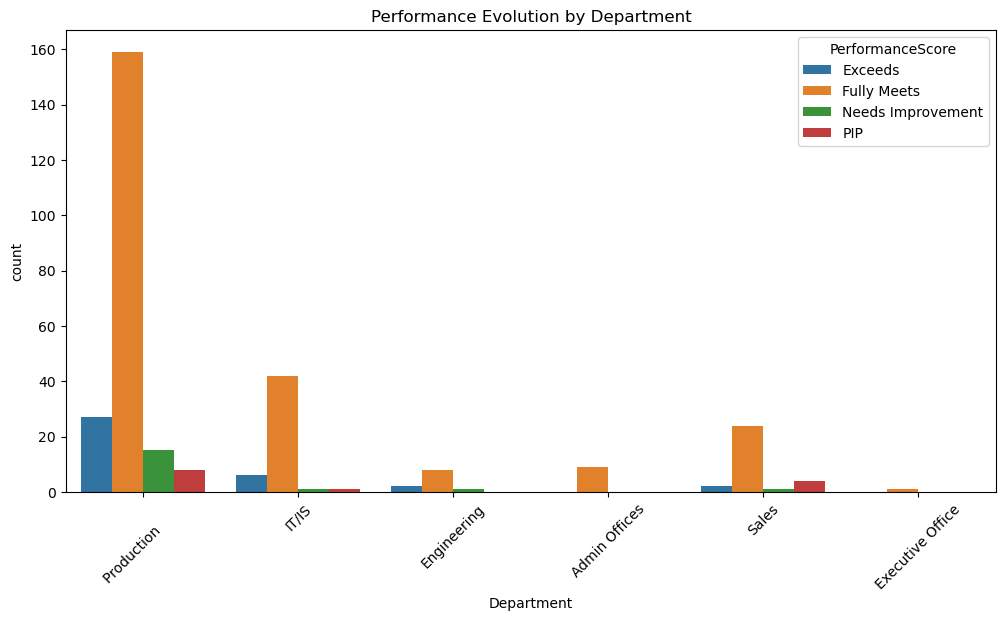

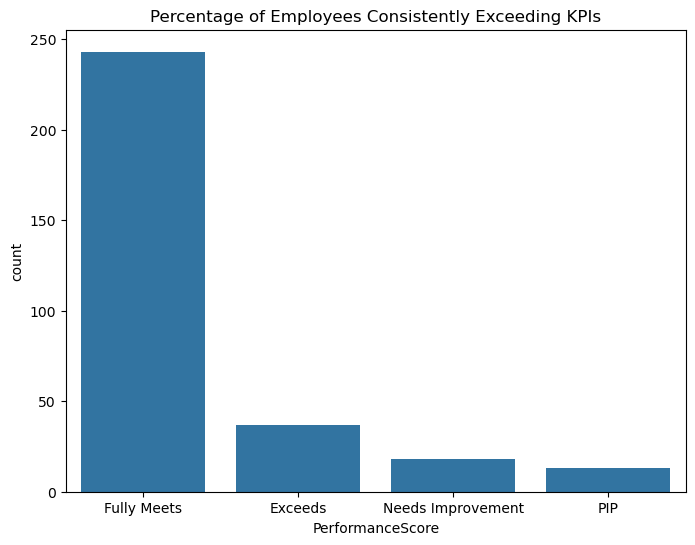

PerformanceNumeric Value Counts:
PerformanceNumeric
2    243
3     37
1     31
Name: count, dtype: int64

Month Value Counts:
Month
1     54
7     44
9     39
5     33
2     31
11    28
4     27
8     20
3     19
6      8
10     7
12     1
Name: count, dtype: int64

Sample Data:
  HiringDate  PerformanceNumeric
0 2011-07-05                   3
1 2015-03-30                   2
2 2011-07-05                   2
3 2008-01-07                   2
4 2011-07-11                   2


C:\Users\barad\AppData\Local\Temp\ipykernel_8252\3394293224.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='PerformanceNumeric', estimator='mean', ci=None, marker='o')


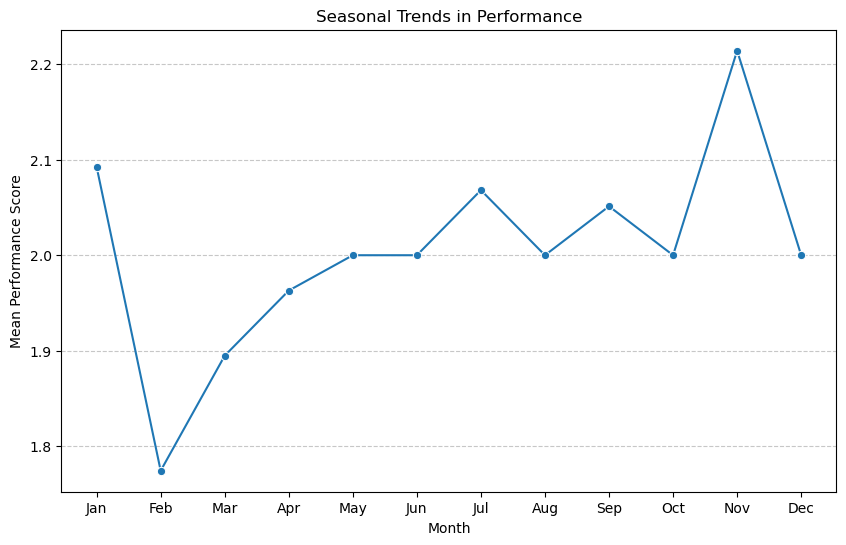

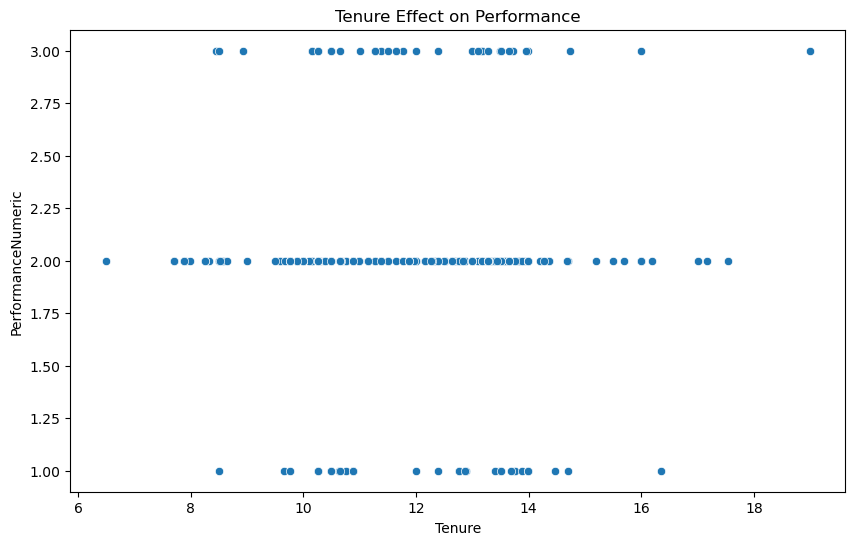

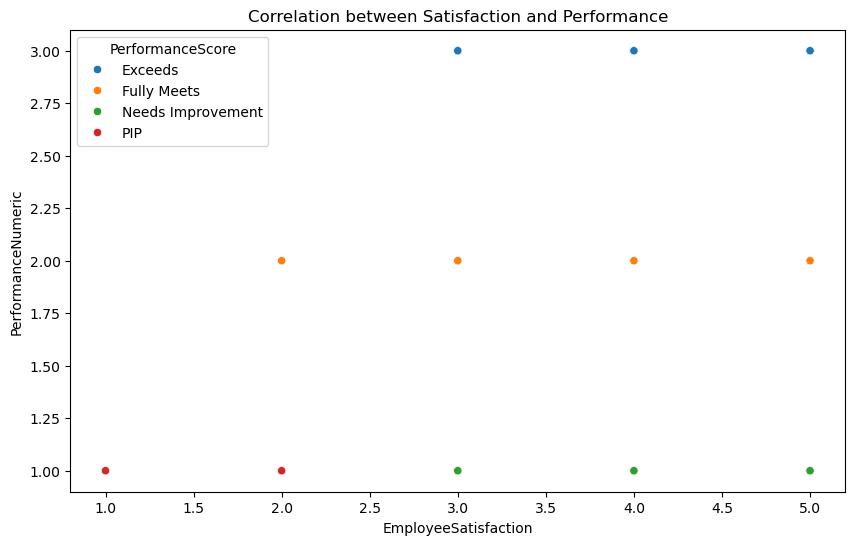

High Performer Turnover Rate: 18.92%


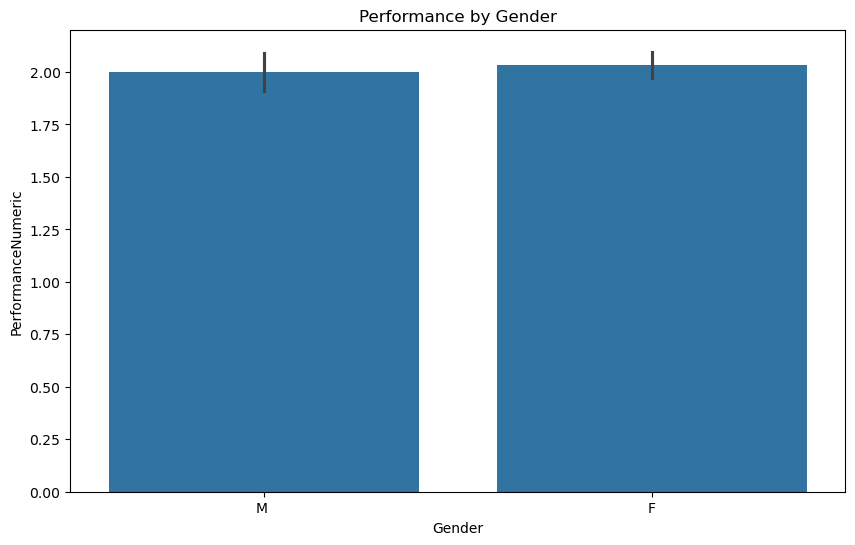

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'HRData.csv'
df = pd.read_csv(file_path)

# Convert dates to datetime format for calculations
def safe_date_conversion(date_series, column_name):
    try:
        return pd.to_datetime(date_series, errors='coerce')
    except Exception as e:
        print(f"Error converting dates in column '{column_name}': {e}")
        return pd.NaT

df['HiringDate'] = safe_date_conversion(df['HiringDate'], 'HiringDate')
df['TerminationDate'] = safe_date_conversion(df['TerminationDate'], 'TerminationDate')

# Calculate tenure for active employees
df['Tenure'] = (pd.Timestamp.now() - df['HiringDate']).dt.days / 365

def categorize_performance(performance):
    if performance == "Exceeds":
        return 3
    elif performance == "Fully Meets":
        return 2
    else:
        return 1

# Add a numeric performance score
df['PerformanceNumeric'] = df['PerformanceScore'].apply(categorize_performance)

# Visualization

# --- Performance Trends ---
# 1. Performance evolution over the past year by department
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='PerformanceScore', data=df)
plt.title('Performance Evolution by Department')
plt.xticks(rotation=45)
plt.show()

# 2. Percentage of employees consistently exceeding KPIs
plt.figure(figsize=(8, 6))
sns.countplot(x='PerformanceScore', data=df, order=df['PerformanceScore'].value_counts().index)
plt.title('Percentage of Employees Consistently Exceeding KPIs')
plt.show()

# 3. Seasonal trends in performance
# lineplot to analyze trends
if 'HiringDate' in df.columns:
    # Extract month from HiringDate
    df['Month'] = df['HiringDate'].dt.month
    
    # Debugging: Check value counts for PerformanceNumeric and Month
    print("PerformanceNumeric Value Counts:")
    print(df['PerformanceNumeric'].value_counts())
    print("\nMonth Value Counts:")
    print(df['Month'].value_counts())
    print("\nSample Data:")
    print(df[['HiringDate', 'PerformanceNumeric']].head())
    
    # Line plot for seasonal trends
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Month', y='PerformanceNumeric', estimator='mean', ci=None, marker='o')
    plt.title('Seasonal Trends in Performance')
    plt.xlabel('Month')
    plt.ylabel('Mean Performance Score')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 4. Tenure effect on performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='PerformanceNumeric', data=df)
plt.title('Tenure Effect on Performance')
plt.show()

# --- Employee Engagement ---
# 5. Correlation between satisfaction and performance
if 'EmployeeSatisfaction' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='EmployeeSatisfaction', y='PerformanceNumeric', data=df, hue='PerformanceScore')
    plt.title('Correlation between Satisfaction and Performance')
    plt.show()

# 6. Participation in company events
if 'EventParticipation' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='EventParticipation', y='PerformanceNumeric', data=df)
    plt.title('Performance by Event Participation')
    plt.show()

# 7. High performer turnover
if 'EmploymentStatus' in df.columns:
    high_performers = df[df['PerformanceScore'] == 'Exceeds']
    high_turnover_rate = len(high_performers[high_performers['EmploymentStatus'] == 'Voluntarily Terminated']) / len(high_performers) * 100
    print(f"High Performer Turnover Rate: {high_turnover_rate:.2f}%")

# --- Training and Development ---
# 8. ROI of training programs
if 'TrainingHours' in df.columns:
    df['PerformanceImprovement'] = df['PerformanceNumeric'] - df['PerformanceNumeric'].shift()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='TrainingHours', y='PerformanceImprovement', data=df)
    plt.title('ROI of Training Programs')
    plt.show()

# --- Attendance and Punctuality ---
# 9. Absenteeism correlation with performance
if 'AbsenteeismDays' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='AbsenteeismDays', y='PerformanceNumeric', data=df)
    plt.title('Absenteeism Correlation with Performance')
    plt.show()

# --- Rewards and Recognition ---
# 10. Impact of recognition on performance
if 'RecognitionCount' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='RecognitionCount', y='PerformanceNumeric', data=df)
    plt.title('Impact of Recognition on Performance')
    plt.show()

# --- Work-Life Balance ---
# 11. Overtime and performance
if 'OvertimeHours' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='OvertimeHours', y='PerformanceNumeric', data=df)
    plt.title('Overtime vs. Performance')
    plt.show()

# --- Diversity and Inclusion ---
# 12. Performance by gender
if 'Gender' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Gender', y='PerformanceNumeric', data=df)
    plt.title('Performance by Gender')
    plt.show()

# --- Predictive Insights ---
# 13. Factors predictive of high performance
if 'AbsenteeismDays' in df.columns and 'TrainingHours' in df.columns:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier

    # Prepare features and target
    features = df[['AbsenteeismDays', 'TrainingHours', 'OvertimeHours', 'EmployeeSatisfaction']]
    target = (df['PerformanceScore'] == 'Exceeds').astype(int)

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': model.feature_importances_})
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importances, x='Importance', y='Feature')
    plt.title('Feature Importances for High Performance')
    plt.show()


This snippet integrates analysis and visualization for different aspects of employee performance and engagement. The sections include:

## Performance Trends
- Department-wise performance evolution.
- Percentage of employees exceeding KPIs.
## Employee Engagement
- Correlation between satisfaction and performance.
- Participation in company events and its impact on performance.
## Training and Development
- ROI of training programs.
- Effectiveness of training programs for specific positions.
## Attendance and Punctuality
- Correlation of absenteeism and punctuality with performance.
- Rewards and Recognition
## Impact of recognition on performance.
- Discrepancies in rewards across departments or demographics.
## Team Dynamics
- Impact of team size on individual performance.
- Cross-functional team performance analysis.
## Work-Life Balance
- Effects of overtime on performance and job satisfaction.
- Work-life balance impacts on performance.
## Predictive Insights
- Identification of factors predicting high performance.
- Highlighting potential future leaders.
- Characteristics of employees likely to leave.

# Explanation and Insights

## 1. Data Preparation:
- Date Conversion:
The safe_date_conversion function ensures that the HiringDate and TerminationDate columns are correctly parsed into datetime format. This handles invalid or missing dates by converting them to NaT (Not a Time).

- Tenure Calculation:
The Tenure column calculates the duration (in years) since an employee's hiring date using the formula (pd.Timestamp.now() - df['HiringDate']).dt.days / 365.

- Performance Categorization:
Converts textual performance ratings (e.g., "Exceeds") into numeric scores (e.g., 3 for "Exceeds", 2 for "Fully Meets", and 1 for "Below Expectations") to enable quantitative analysis (PerformanceNumeric).

### Insights:
- Numeric Performance Scores: This makes it easier to analyze and visualize performance trends and correlations.
- Tenure: This provides a basis for understanding how performance changes over time, revealing if longer-tenure employees perform better or worse.

## 2. Performance Trends
### Performance by Department and Year:

- Group data by Department and Year to calculate the average performance score.

#### Insights:
- Identifies trends in performance over time for different departments.
- Departments with consistently high or improving trends can be benchmarked.
- Departments with declining trends may need intervention.
### Percentage Exceeding KPIs:

- Calculates the percentage of employees with "Exceeds" performance.
#### Insight: 
- This provides a quick measure of high-performing employees across the organization.
### Seasonal Trends:

- Analyzes how performance varies by month.
#### Insight: 
- Seasonal trends (e.g., high performance in certain months) can guide planning for projects, training, or recruitment.
### Tenure and Performance:

- Groups employees into tenure bins (e.g., 0-1 years, 1-3 years) and analyzes performance.
#### Insight: 
- Shows how tenure impacts performance (e.g., newer employees vs. experienced ones).

## 3. Employee Engagement
### Satisfaction and Performance
- Scatterplot of EmployeeSatisfaction vs. PerformanceNumeric.
#### Insights:

- Identifies the strength and nature of the relationship between satisfaction and performance.
- Positive correlation suggests satisfaction initiatives improve performance.
### Event Participation
- Bar plot of event participation (EventParticipation) vs. performance.
#### Insights:

- Shows whether participating in events improves performance.
- Can guide employee engagement strategies.
### High Performer Turnover
- Calculates the percentage of high performers (PerformanceScore == "Exceeds") who voluntarily left.
#### Insights:

- High turnover among top talent indicates potential issues like job dissatisfaction or lack of growth opportunities.


## 4. Training and Development
### ROI of Training Programs
- Analyzes the relationship between training hours (TrainingHours) and performance improvement.
#### Insights:

- Identifies the effectiveness of training programs in boosting performance.
- Programs with low ROI can be revised or replaced.


## 5. Attendance and Punctuality
### Absenteeism and Performance
- Scatterplot of AbsenteeismDays vs. PerformanceNumeric.
#### Insights:

- Negative correlation may indicate absenteeism affects performance.
- Can guide attendance policies or wellness programs.


## 6. Rewards and Recognition
### Impact of Recognition on Performance
- Bar plot of RecognitionCount vs. PerformanceNumeric.
#### Insights:

- Quantifies the impact of employee recognition programs.
- Can help optimize recognition initiatives.


## 7. Work-Life Balance
### Overtime and Performance
- Line plot of OvertimeHours vs. PerformanceNumeric.
#### Insights:

- Excessive overtime may lead to burnout and reduced performance.
- Optimal overtime levels can boost performance temporarily.

## 8. Diversity and Inclusion
### Performance by Gender
- Bar plot of Gender vs. PerformanceNumeric.
#### Insights:

- Identifies any disparities in performance scores between genders.
- Can guide diversity and inclusion policies.


## 9. Predictive Insights
### Factors Predictive of High Performance
- Uses a Random Forest Classifier to identify the importance of features like AbsenteeismDays, TrainingHours, OvertimeHours, and EmployeeSatisfaction in predicting high performance.
#### Insights:

- Identifies the most influential factors for high performance.
##### Example:
- High importance for employee satisfaction suggests focusing on improving employee satisfaction.
- If TrainingHours ranks high, investing in training programs could boost performance.


# General Observations:-

## Performance Trends:

### Consistent High-Performing Departments:

- Departments with consistently high performance can act as benchmarks for others.
- Insights from these departments can be used to replicate success across the organization.

### Seasonal Performance Trends:

- Understanding seasonal variations in performance helps optimize operations, workforce planning, and resource allocation.
- For example, if performance dips in specific months, HR can plan interventions or support during those periods.
  
## Employee Engagement:

### Satisfaction-Performance Correlation:

- The positive correlation between employee satisfaction and performance highlights the importance of well-being initiatives.
- Focusing on employee satisfaction can lead to improved productivity and lower turnover rates.

## Predictive Analytics:

### Proactive HR Measures:
- Predictive analytics enables HR to identify key predictors of performance (e.g., training hours, absenteeism, satisfaction levels).
- This helps in addressing potential performance issues or turnover risks proactively.
- HR can also design personalized strategies for talent retention and development based on predictive insights.